# **Importing  Libraries**

In [64]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# **Dataset Loading**

In [65]:
dataset = pd.read_csv('https://raw.githubusercontent.com/tanim913/machine-learning-python/main/1.%20Data-Preprocessing/glass.csv')

In [66]:
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [67]:
#checking data type and null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [68]:
#checking null values
dataset.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [69]:
#checking Over of data distribution
dataset.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# 3. Data Visulization

In [70]:
dataset["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

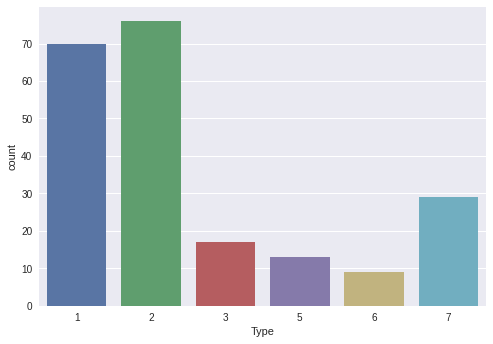

In [71]:
sns.countplot(x=dataset['Type'])

## 3.1 Glass Types Distribution Pie Chart

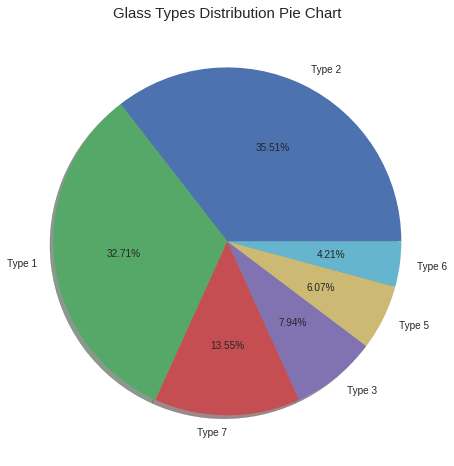

In [72]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(10,8))

plt.pie(x=dataset["Type"].value_counts(), 
        labels=["Type 2", "Type 1", "Type 7", "Type 3", "Type 5", "Type 6"],
        shadow = True, 
        autopct="%1.2f%%", 
        )
plt.title("Glass Types Distribution Pie Chart",fontsize=15)
plt.show()

## 3.2 Features Visualisation

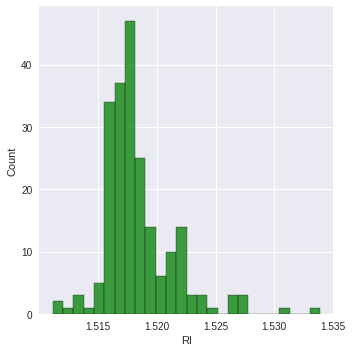

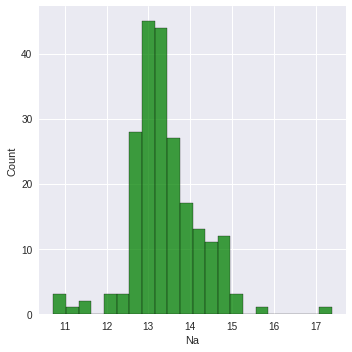

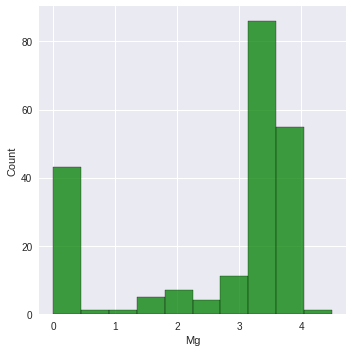

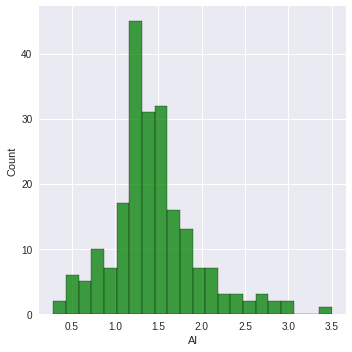

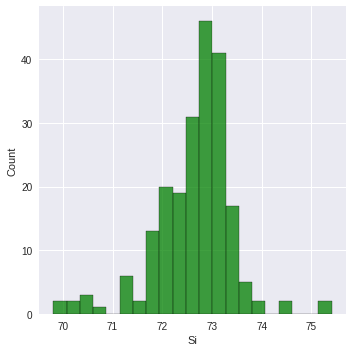

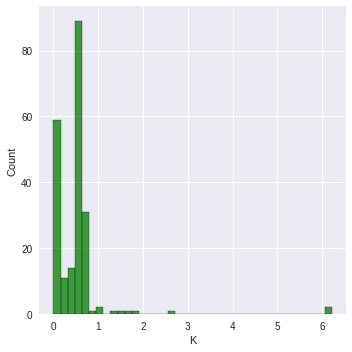

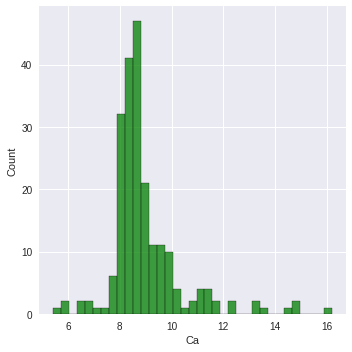

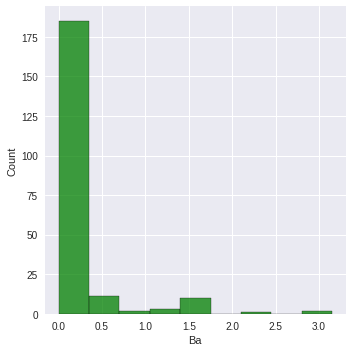

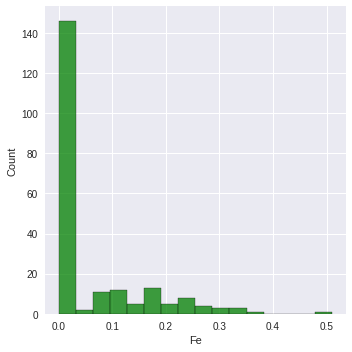

In [73]:
for column in dataset.columns[:-1]:
  sns.displot(dataset[column], color= 'g')
  plt.grid(True)
  plt.show()


# 4. Separating features and target column

In [74]:
# Separating Features and Label
x=dataset.drop(columns=['Type'])
y=dataset['Type']

# 5. Splitting dataset in train data and test data

In [75]:
# splitting dataset in train data and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=4)

# 6.Classification Models

## 6.1 Logistic Regression

In [76]:
# as accuracy is very less we use scalling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale_xtrain=scale.fit_transform(xtrain)
scale_xtest=scale.fit_transform(xtest)

In [77]:
# training and fitting model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(scale_xtrain,ytrain)
ypred1=model.predict(scale_xtest)

In [78]:
# Evaluation of Model
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, precision_score

lg_acc = accuracy_score(ytest, ypred1)
lg_mse = mean_squared_error(ytest, ypred1)
lg_f1 = f1_score(ytest, ypred1, average='macro')
lg_precision = precision_score(ytest, ypred1, average='macro')

print('Accuracy is: %.4f' % lg_acc)
print('Mean Squared Error is: %.4f' % lg_mse)
print('F1 Score is: %.4f' % lg_f1)
print('Precision Score is:  %.4f' % lg_precision)

Accuracy is: 0.8140
Mean Squared Error is: 1.1628
F1 Score is: 0.6593
Precision Score is:  0.7039


## 6.2 KNN (k-nearest neighbors)




In [79]:
# training and fitting model
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(xtrain,ytrain)
ypred2=model.predict(xtest)

In [80]:
# Evaluation of Model
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, precision_score

knn_acc = accuracy_score(ytest,ypred2)
knn_mse = mean_squared_error(ytest, ypred2)
knn_f1 = f1_score(ytest, ypred2, average='macro')
knn_precision = precision_score(ytest, ypred2, average='macro')


print('Accuracy is: %.4f' % knn_acc)
print('Mean Squared Error is: %.4f' % knn_mse)
print('F1 Score is: %.4f' % knn_f1)
print('Precision Score is:  %.4f' % knn_precision)


Accuracy is: 0.7674
Mean Squared Error is: 1.3953
F1 Score is: 0.6179
Precision Score is:  0.6512


## 6.3 SVC Support Vector Classifier


In [81]:
# training and fitting model
from sklearn.svm import SVC
model=SVC(kernel="linear")
model.fit(scale_xtrain,ytrain)
ypred3=model.predict(scale_xtest)

In [82]:
# Evaluation of Model
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, precision_score

svc_acc = accuracy_score(ytest,ypred3)
svc_mse = mean_squared_error(ytest, ypred3)
svc_f1 = f1_score(ytest, ypred3, average='macro')
svc_precision = precision_score(ytest, ypred3, average='macro')


print('Accuracy is: %.4f' % svc_acc)
print('Mean Squared Error is: %.4f' % svc_mse)
print('F1 Score is: %.4f' % svc_f1)
print('Precision Score is:  %.4f' % svc_precision)





Accuracy is: 0.8372
Mean Squared Error is: 0.7907
F1 Score is: 0.7307
Precision Score is:  0.7130


## 6.4 Naive Byes


In [83]:
# training and fitting model
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(xtrain,ytrain)
ypred4=model.predict(xtest)

In [84]:
# Evaluation of Model
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, precision_score

GNB_acc = accuracy_score(ytest,ypred4)
GNB_mse = mean_squared_error(ytest, ypred4)
GNB_f1 = f1_score(ytest, ypred4, average='macro')
GNB_precision = precision_score(ytest, ypred4, average='macro')


print('Accuracy is: %.4f' % GNB_acc)
print('Mean Squared Error is: %.4f' % GNB_mse)
print('F1 Score is: %.4f' % GNB_f1)
print('Precision Score is:  %.4f' % GNB_precision)


Accuracy is: 0.4884
Mean Squared Error is: 1.3488
F1 Score is: 0.4368
Precision Score is:  0.5109


## 6.5 Decision Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred5=model.predict(xtest)

In [86]:
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, precision_score

Dt_acc = accuracy_score(ytest,ypred5)
Dt_mse = mean_squared_error(ytest, ypred5)
Dt_f1 = f1_score(ytest, ypred5, average='macro')
Dt_precision = precision_score(ytest, ypred5, average='macro', zero_division=1)


print('Accuracy is: %.4f' % Dt_acc)
print('Mean Squared Error is: %.4f' % Dt_mse)
print('F1 Score is: %.4f' % Dt_f1)
print('Precision Score is:  %.4f' % Dt_precision)


Accuracy is: 0.7907
Mean Squared Error is: 1.9535
F1 Score is: 0.5085
Precision Score is:  0.6886


## 6.6 Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=20)
model.fit(xtrain,ytrain)
ypred6=model.predict(xtest)

In [88]:
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, precision_score

RFC_acc = accuracy_score(ytest,ypred6)
RFC_mse = mean_squared_error(ytest, ypred6)
RFC_f1 = f1_score(ytest, ypred6, average='macro')
RFC_precision = precision_score(ytest, ypred6, average='macro', zero_division=1)


print('Accuracy is: %.4f' % RFC_acc)
print('Mean Squared Error is: %.4f' % RFC_mse)
print('F1 Score is: %.4f' % RFC_f1)
print('Precision Score is:  %.4f' % RFC_precision)

Accuracy is: 0.9070
Mean Squared Error is: 0.8837
F1 Score is: 0.7829
Precision Score is:  0.8528


#7. Comparing the accuracy of different models

In [94]:
models=[("LogisticRegression",lg_acc),
        ("KNeighborsClassifier",knn_acc),
        ("SVM",svc_acc),
        ("GuessinNB",GNB_acc),
        ("DecisionTree",Dt_acc),
        ("RanodmForest",RFC_acc),
        
]

In [95]:
predict_percent = pd.DataFrame(data = models, columns=['Model', "Accuracy"])
predict_percent

,Model,Accuracy
0,LogisticRegression,0.813953
1,KNeighborsClassifier,0.767442
2,SVM,0.837209
3,GuessinNB,0.488372
4,DecisionTree,0.790698
5,RanodmForest,0.906977


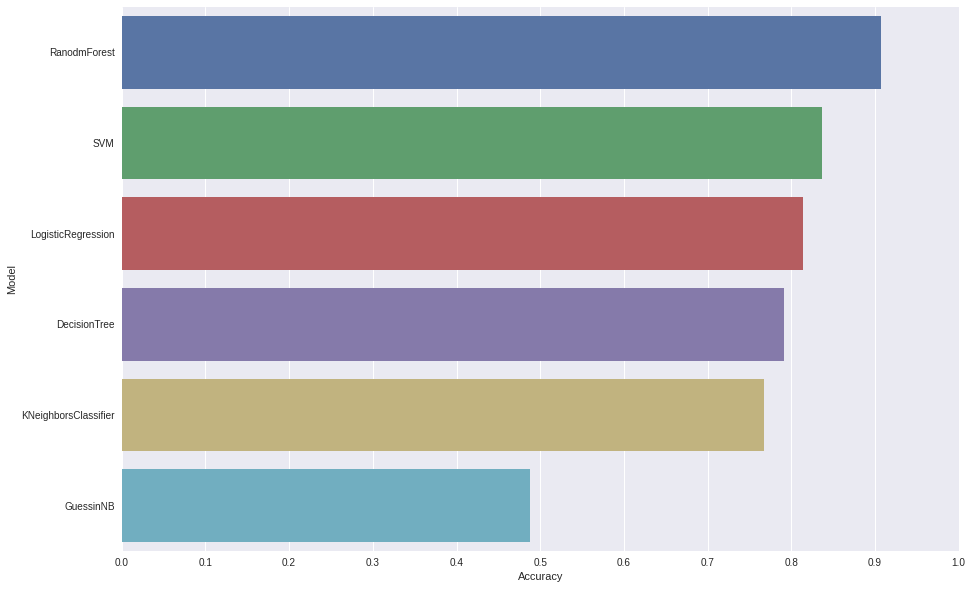

In [92]:
# plogttin bargraph of r2score of each model
f, axe = plt.subplots(1,1, figsize=(15,10))
predict_percent.sort_values(by=['Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Accuracy', y='Model', data = predict_percent, ax = axe)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()